<a href="https://colab.research.google.com/github/16Komang/PCVK/blob/main/ProjectUTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Menghubungkan google colab dan google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# Mengimport modul dari phyton
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

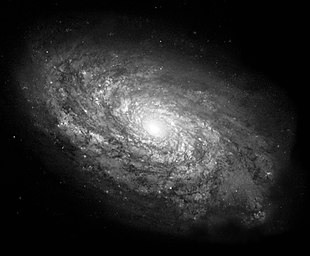

In [27]:
# Memasukan gambar yang akan di filtering dari google drive
img = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

## Filtering Mean

In [28]:
# Fungsi Konvolusi
def filtering(image, kernel, stride, padding):
  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # Konvolusi process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
  return new_image

Original


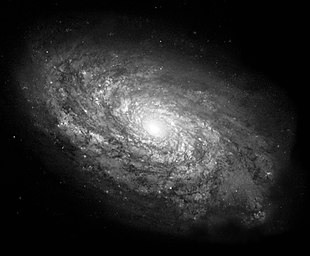

Mean


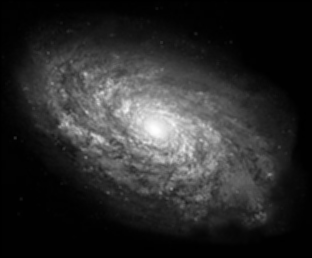

In [29]:
# Kodingan mean
kernal_mean = np.array([[1/9,1/9,1/9],
                       [1/9,1/9,1/9],
                       [1/9,1/9,1/9]])
# Hasil
print('Original')
cv2_imshow(img_gray)
print('Mean')
cv2_imshow(filtering(img_gray,kernal_mean,1,2))

## Filtering Median

Original


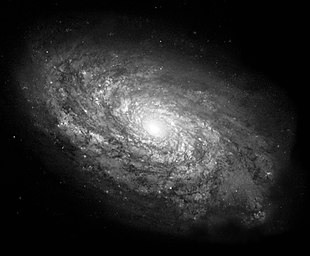

Median


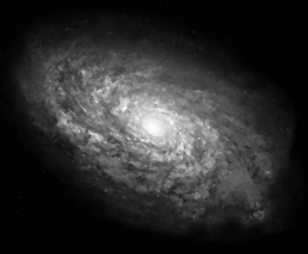

In [30]:
def median_filter(image, kernel_size):
    height, width = image.shape
    kernel_height, kernel_width = kernel_size, kernel_size
    output_height = height - kernel_height + 1
    output_width = width - kernel_width + 1

    output_image = np.zeros((output_height, output_width), dtype=image.dtype)

    for y in range(output_height):
        for x in range(output_width):
            kernel = image[y:y+kernel_height, x:x+kernel_width].flatten()
            output_image[y, x] = np.median(kernel)

    output_image = output_image.astype(image.dtype)

    return output_image

kernel_median = 3
result = median_filter(img_gray, kernel_median)

print('Original')
cv2_imshow(img_gray)
print('Median')
cv2_imshow(result)

## Filtering Modus

Original


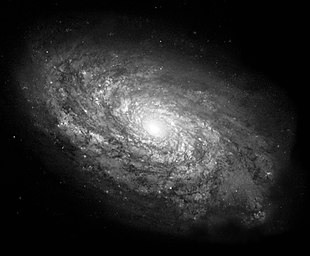

Modus


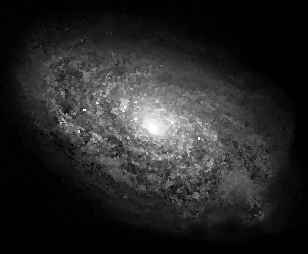

In [31]:
def filter_modus(image, kernel_size):
    height, width = image.shape
    kernel_height, kernel_width = kernel_size, kernel_size
    output_height = height - kernel_height + 1
    output_width = width - kernel_width + 1

    output_image = np.zeros((output_height, output_width), dtype=image.dtype)

    for y in range(output_height):
        for x in range(output_width):
            kernel = image[y:y+kernel_height, x:x+kernel_width].flatten()
            output_image[y, x] = np.bincount(kernel).argmax()

    output_image = output_image.astype(image.dtype)

    return output_image

kernel_modus = 3
result = filter_modus(img_gray, kernel_modus)

print('Original')
cv2_imshow(img_gray)
print('Modus')
cv2_imshow(result)

## High Pass Filtering

Original


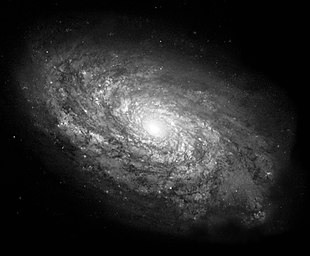

High


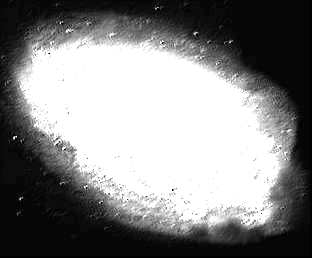

In [39]:
# Kodingan High
kernal_high = np.array([[-1,0,1],
                       [-1,0,3],
                       [3,0,1]])
# Hasil
print('Original')
cv2_imshow(img_gray)
print('High')
cv2_imshow(filtering(img_gray,kernal_high,1,2))

## Low Pass Filltering

Original


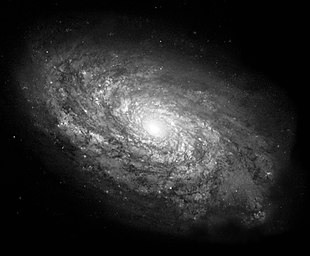

Low


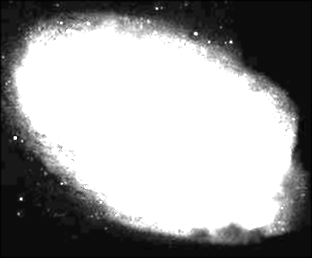

In [38]:
# Kodingan Low
kernal_low = np.array([[1,1,1],
                       [1,4,1],
                       [1,1,1]])
# Hasil
print('Original')
cv2_imshow(img_gray)
print('Low')
cv2_imshow(filtering(img_gray,kernal_low,1,2))